In [ ]:
#Importing Libraries
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  # <-- add this

from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('/content/fake_job_postings.csv.zip')

In [ ]:
# display first 5 records
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data['employment_type'].unique()

array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [ ]:
data.shape

(17880, 18)

In [ ]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
data.dtypes

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [ ]:
data.isna().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [ ]:
# deleting unnecessary columns
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],
        axis=1, inplace=True)

In [ ]:
data.shape
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [ ]:
# filling missing values with blank
data.fillna(' ', inplace=True)

In [ ]:
#Create independent and Dependent Features

#converting column names into list
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting
target = "fraudulent"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)

df2 = pd.DataFrame(y_res)

# the default behaviour is join='outer'
# inner join

result = pd.concat([df1, df2], axis=1, join='inner')
display(result)
data=result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
14378,Full-Stack Software Developer,"DE, BY, Munich",tech,hello worldtalents23_ drives the change in dig...,We are the most efficient and motivating way t...,Frontend: We are looking for developers with d...,Why working with us:High impact and responsibi...,Full-time,Associate,,"Health, Wellness and Fitness",Engineering,0
2703,Design Director,"NZ, N, Auckland",,Tailor is a digital agency specialising in thr...,We're looking for a Design Director to head up...,,,,,,,,0
9657,Civil Engineer,"US, FL, Lake Mary",,,RESPONSIBILITIES:This position is responsible ...,REQUIRED SKILLS:Must have proficiency in readi...,,Contract,,,Utilities,,0
269,English Teacher Abroad,"US, NJ, Newark\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...",,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Contract,,Bachelor's Degree,Education Management,,0
12585,Mobile UI Designer,"US, NY, New York",Product,About the CompanyAviary makes the world’s best...,Aviary is seeking to hire a talented designer ...,4+ years experience designing and working with...,,Full-time,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)

df2 = pd.DataFrame(y_res)

# the default behaviour is join='outer'
# inner join

result = pd.concat([df1, df2], axis=1, join='inner')
display(result)
data=result;

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
1478,Tech Support Specialist,"US, CA, Temecula",,"Founded in 2009, Greene Health Care Inc. is th...",Position SummaryWe are looking to hire a candi...,"- Excellent customer service, organizational s...",- Salary will be based on skill level and expe...,Full-time,Entry level,Some College Coursework Completed,Computer Software,Customer Service,0
5854,Business Planning Executive,"GR, I, Athens",Sales,Upstream’s mission is to revolutionise the way...,The Business Planning Executive reports direct...,Normal 0 false false false ...,Salary &amp; Benefits: Includes attractive com...,Full-time,Mid-Senior level,Bachelor's Degree,Telecommunications,Finance,0
1966,System Specialist,"US, NC, Charlotte",Student Financial Services,Thank you for your interest in building a care...,"The System Specialist is a full time, salary n...","Experience, Knowledge and Skills Required:Mini...","Queens University of Charlotte is a private, c...",Full-time,Associate,Bachelor's Degree,Higher Education,,0
15772,Product Manager,"US, NY,",,Bandsintown is a digital media company powered...,Bandsintown is the No. 1 concert discovery app...,"5+ years in a product management role, working...",Competitive Salary based on experienceThree we...,Full-time,,,Music,Product Management,0
12657,General Production,"US, KS, Salina",,Vortex® is considered the world leader in valv...,Vortex is a rapidly growing company that is al...,,,,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [ ]:
data.isnull().sum()

,0
title,0
location,0
department,0
company_profile,0
description,0
requirements,0
benefits,0
employment_type,0
required_experience,0
required_education,0


***EDA***

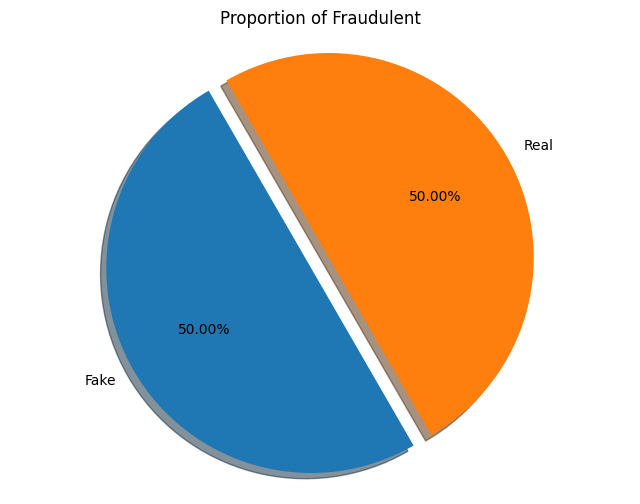

In [ ]:
#39 Checking for distribution of percentages belonging to real class and fraud class
# 1 = Fake post, 2 = real post

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent")
plt.show()

In [ ]:
# Visualizing which country is posting most of the jobs

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

,country
1478,US
5854,GR
1966,US
15772,US
12657,US
...,...
17827,US
17828,AU
17829,PL
17830,US


In [ ]:
# this will give unique country values
data['country'].nunique()

48

In [ ]:
# top 10 country that post jobs
data['country'].value_counts()[:11]

,count
country,
US,1217
GB,151
GR,52
AU,49
,39
CA,31
DE,28
IN,20
NZ,19


dict_keys(['US', 'GB', 'GR', 'AU', 'CA', 'DE', 'IN', 'NZ', 'MY', 'IE'])

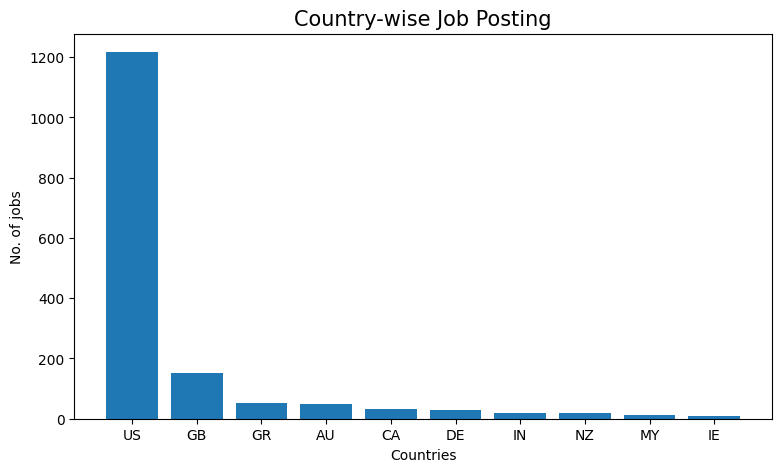

In [ ]:
# creating a dictionary(key-value pair) with top 10 country

country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values

plt.figure(figsize=(9,5))
plt.title('Country-wise Job Posting', size=15)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)
country.keys()

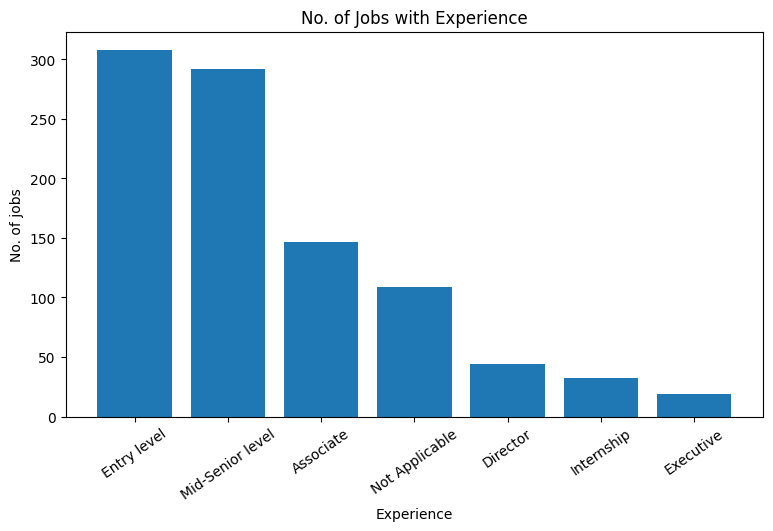

In [ ]:
# visualizing jobs based on experience

experience = dict(data.required_experience.value_counts())
del experience[' ']

plt.figure(figsize=(9,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
#Most frequent jobs
print(data.title.value_counts()[:10])

title
English Teacher Abroad                                                  23
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         19
Administrative Assistant                                                17
Customer Service Associate                                              13
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Data Entry                                                              10
Name: count, dtype: int64


In [ ]:
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Payroll Clerk                                                           10
Name: count, dtype: int64


In [ ]:
# For textual type data we will try to create word cloud
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']+' '+data['function']+' '+data['country']+' '+data['employment_type']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [ ]:
data.head()

,fraudulent,text
1478,0,"Tech Support Specialist US, CA, Temecula Found..."
5854,0,"Business Planning Executive GR, I, Athens Ups..."
1966,0,"System Specialist US, NC, Charlotte Thank you ..."
15772,0,"Product Manager US, NY, Bandsintown is a dig..."
12657,0,"General Production US, KS, Salina Vortex® is c..."


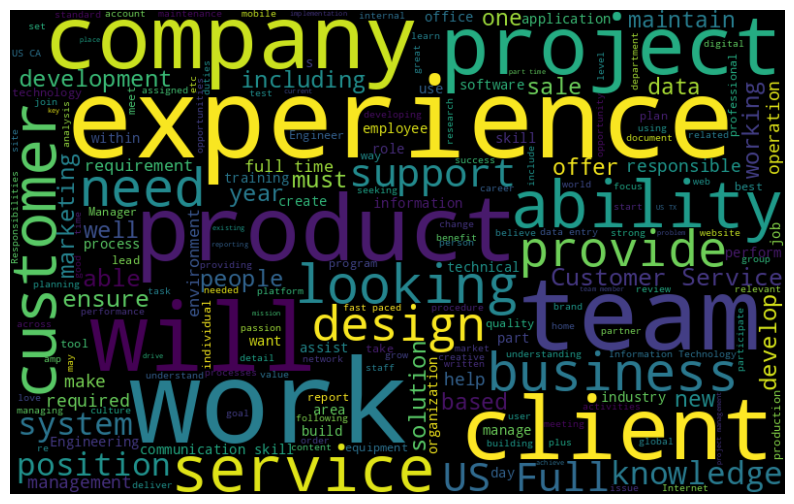

In [ ]:
from wordcloud import WordCloud

# visualizing all the words in our data using the wordcloud plot
all_words = ''.join([text for text in data["text"]])

wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

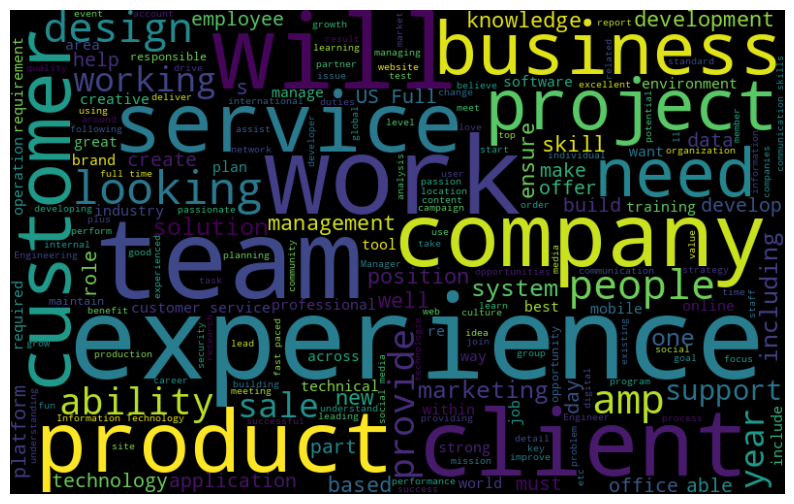

In [ ]:
# visualizing common words in real job posting

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

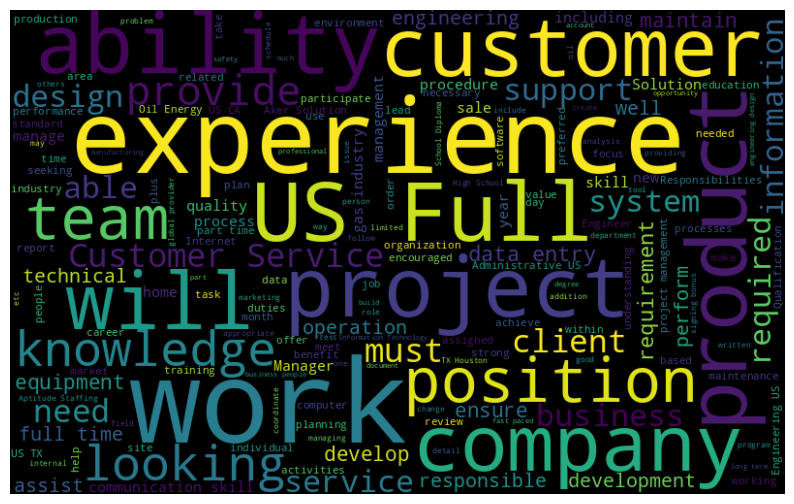

In [ ]:
# visualizing common words in real job posting

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Data Preapration

In [ ]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.words("english"))

#loading the stopwords
stop_words = set(stopwords.words("english"))

#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

data['text'].iloc[0]


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

'tech support specialist us, ca, temecula founded 2009, greene health care inc. leading provider hospice solutions. facilitate health care convergence secure cloud- based portal technologies enabling health care organizations serve needs patients, employees, physicians partners. position summarywe looking hire candidate assist resolving customers technical concerns software training issues. candidate solid technical aptitude, knows various operating systems help non-technical technical users resolve technical concerns timely manner phone and/or via email.this entry-level position seeking candidates understand need earn position within company hard work commitment company. individuals hire confident yet open instruction time. self-starters continuously look ways contribute company. eager contribute task regardless importance relevance normal position company. embody attributes opportunity advance within organization responsibility pay.job descriptionyour job duties include wide variety 

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

# what does X-train and y_train contain
print(y_train)
print(X_train)

17536    1
8252     1
17709    1
11628    1
15446    0
        ..
15566    0
5115     1
6202     1
17185    0
4737     1
Name: fraudulent, Length: 1212, dtype: int64
17536    data entry us, md, baltimore medical company s...
8252     civil engineer ii us, tx, houston choose aecom...
17709    accountant gb, lnd, company accountant require...
11628    sales professional- smb (full-time) us, md, ba...
15446    business development manager - web content man...
                               ...                        
15566    developers community ace us, ca, san francisco...
5115     customer service representative us, ca, los an...
6202     market specialists us, oh, cincinnati bradley ...
17185    branch associate us, ma, malden outstanding me...
4737     need 25 agents growing company-see us, va, sta...
Name: text, Length: 1212, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Converting the data into vector format

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)

In [ ]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 202735 stored elements and shape (1212, 20268)>
  Coords	Values
  (0, 244)	1
  (0, 540)	2
  (0, 853)	1
  (0, 871)	1
  (0, 904)	1
  (0, 1351)	1
  (0, 1724)	1
  (0, 1817)	1
  (0, 2047)	1
  (0, 2336)	1
  (0, 2834)	1
  (0, 3391)	1
  (0, 3600)	1
  (0, 3674)	1
  (0, 3706)	1
  (0, 3855)	1
  (0, 4125)	1
  (0, 4379)	1
  (0, 4528)	1
  (0, 4629)	3
  (0, 4923)	1
  (0, 5016)	1
  (0, 5107)	1
  (0, 5218)	1
  (0, 5736)	1
  :	:
  (1211, 18213)	7
  (1211, 18339)	1
  (1211, 18413)	1
  (1211, 18444)	2
  (1211, 18676)	1
  (1211, 18683)	1
  (1211, 19215)	5
  (1211, 19290)	1
  (1211, 19700)	1
  (1211, 19708)	1
  (1211, 19742)	1
  (1211, 19755)	1
  (1211, 19793)	1
  (1211, 19823)	1
  (1211, 19853)	1
  (1211, 19908)	1
  (1211, 19965)	1
  (1211, 19988)	1
  (1211, 19997)	1
  (1211, 20087)	1
  (1211, 20096)	1
  (1211, 20154)	1
  (1211, 20160)	1
  (1211, 20162)	1
  (1211, 20188)	1


In [ ]:
# transform testing data using fitted vocabulary into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 81905 stored elements and shape (520, 20268)>

Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  # <-- add this
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import pickle

Logistic Reg. Model

In [ ]:
lr = LogisticRegression()

%time lr.fit(X_train_dtm, y_train)

CPU times: user 1.78 s, sys: 3.65 ms, total: 1.78 s
Wall time: 1.17 s


LogisticRegression()

In [ ]:
# make class predictions for X_test_dtm
y_pred_lr = lr.predict(X_test_dtm)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_lr))

Classification Accuracy: 0.9288461538461539
Classification Report

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       263
           1       0.91      0.95      0.93       257

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520

Confusion Matrix

[[240  23]
 [ 14 243]]


Text(95.72222222222221, 0.5, 'Truth')

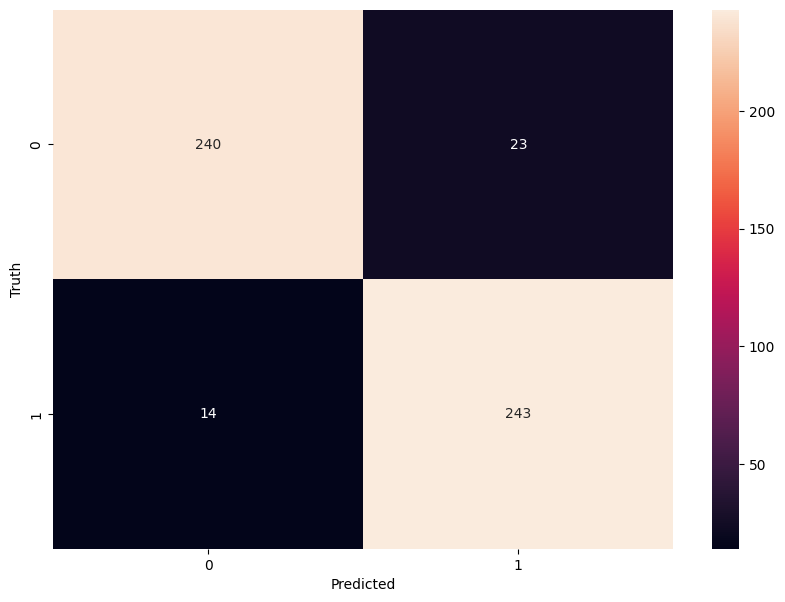

In [ ]:
# Confusion Matrix

import seaborn as sns
cm = confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Naive Bayes Classifier

In [ ]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to
# %time will give the time taken by the system for execution

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 7.54 ms, sys: 39 µs, total: 7.57 ms
Wall time: 7.35 ms


MultinomialNB()

Classification Accuracy: 0.926923076923077
Classification Report

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       263
           1       0.94      0.91      0.92       257

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520

Confusion Matrix

[[249  14]
 [ 24 233]]


Text(95.72222222222221, 0.5, 'Truth')

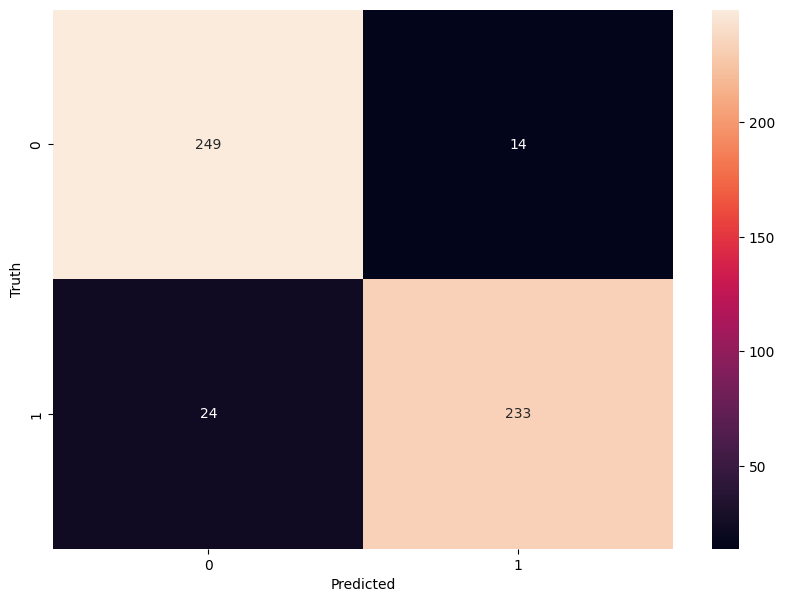

In [ ]:
y_pred_nb = nb.predict(X_test_dtm)

accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Linear SVC (Liblinear lib.)

In [ ]:
lrsvc = LinearSVC()
%time lrsvc.fit(X_train_dtm, y_train)

CPU times: user 352 ms, sys: 422 µs, total: 352 ms
Wall time: 360 ms


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
# make class predictions for X_test_dtm
y_pred_lrsvc = lrsvc.predict(X_test_dtm)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_lrsvc))
print("Classification Report\n")
print(classification_report(y_test, y_pred_lrsvc))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_lrsvc))

Classification Accuracy: 0.925
Classification Report

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       263
           1       0.91      0.95      0.93       257

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.92       520
weighted avg       0.93      0.93      0.92       520

Confusion Matrix

[[238  25]
 [ 14 243]]


Text(95.72222222222221, 0.5, 'Truth')

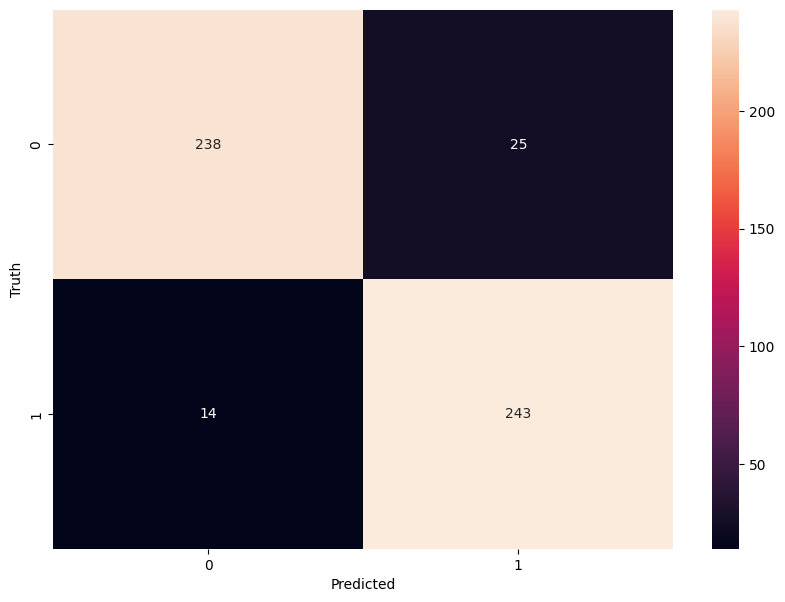

In [ ]:
# Confusion Matrix

import seaborn as sns
cm = confusion_matrix(y_test,y_pred_lrsvc)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
%time rf.fit(X_train_dtm, y_train)

CPU times: user 1.37 s, sys: 5.21 ms, total: 1.37 s
Wall time: 1.41 s


RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test_dtm)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_rf))

Classification Accuracy: 0.9307692307692308
Classification Report

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       263
           1       0.94      0.91      0.93       257

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520

Confusion Matrix

[[249  14]
 [ 22 235]]


Decision Tree Classifier

In [ ]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

#train the model
# using X_train_dtm (timing it with an IPython "magic command")
%time dt.fit(X_train_dtm, y_train)

CPU times: user 593 ms, sys: 609 µs, total: 593 ms
Wall time: 610 ms


DecisionTreeClassifier()

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))

Classification Accuracy: 0.8711538461538462
Classification Report

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       263
           1       0.86      0.88      0.87       257

    accuracy                           0.87       520
   macro avg       0.87      0.87      0.87       520
weighted avg       0.87      0.87      0.87       520

Confusion Matrix

[[226  37]
 [ 30 227]]


Text(95.72222222222221, 0.5, 'Truth')

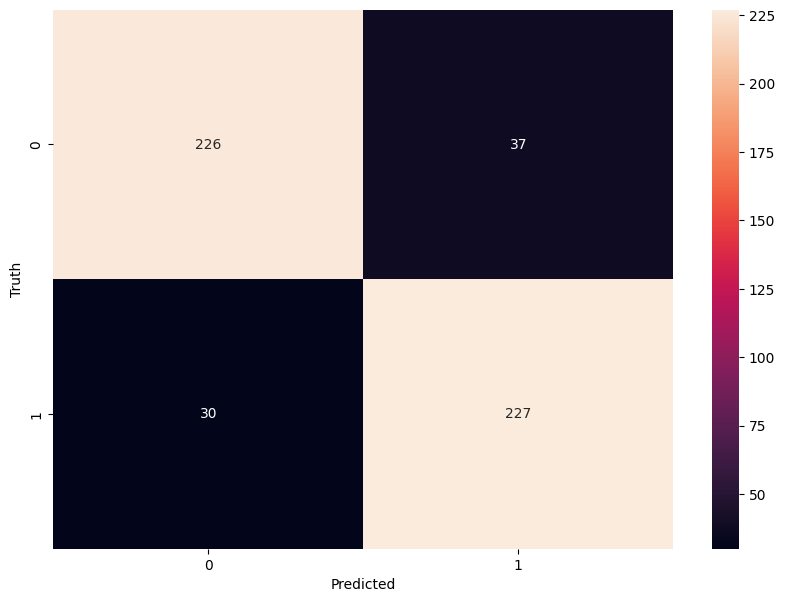

In [ ]:
# Confusion Matrix

import seaborn as sns
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Building a Predictive System

In [ ]:
# Predicting for a data set
X_train

,text
17536,"data entry us, md, baltimore medical company s..."
8252,"civil engineer ii us, tx, houston choose aecom..."
17709,"accountant gb, lnd, company accountant require..."
11628,"sales professional- smb (full-time) us, md, ba..."
15446,business development manager - web content man...
...,...
15566,"developers community ace us, ca, san francisco..."
5115,"customer service representative us, ca, los an..."
6202,"market specialists us, oh, cincinnati bradley ..."
17185,"branch associate us, ma, malden outstanding me..."


In [ ]:
print(len(X_train))

1212


In [ ]:
print(X_train.iloc[184])  # ✅ Correct way for pandas DataFrame


qa engineer us, ca, san jose netgear aptitude staffing solutions partnered effort streamline hiring process provide efficient effective recruitng model. focus help develop achieve career goals makeing solid geographical, cultural professional fiit leveraging career new exciting professional venture! netgear, inc. (nasdaqgm: ntgr) designs innovative, branded technology solutions address specific networking, storage, security needs small- medium-sized businesses home users. company offers end-to-end networking product portfolio enable users share internet access, peripherals, files, multimedia content, applications among multiple computers internet-enabled devices. products built variety proven technologies wireless, ethernet powerline, focus reliability ease-of-use. netgear products sold 27,000 retail locations around globe, via 37,000 value-added resellers. company's headquarters san jose, calif., additional offices 25 countries. recruiting: #email_f4da338e899ddba983ac771b001681d1d2d93

In [ ]:
input_data=["internship (advertising) gr, , initiative led talented, energetic inspirational group young greek leaders called “global shapers athens hub”, umbrella world economic forum. nutshell, objective corporate-business community align global shapers order develop implement internship program, whereby companies commit taking board selected talented graduates 6-month internships – order offer work experience / skill building ultimately support development young talent enter local market. 6-month full-time paid internship position largest corporations greece. internship program includes classroom job training, team projects, networking profound business leaders greek job market, community service non-governmental organizations. information: #url_3a192fa44cc0cec563d796313a1fbbbaf5543bb685aa98e0143dc082adc1ab4f#candidates applying one job families, matched job family relevant studies/profile. bachelor's degree majors (aei, tei, college)limited working experiencefluent english working experience leading corporationsholistic classroom training personal developmenton job coaching specific projectsregular sessions senior leaders participating organizations marketing advertising advertising gr full-time"]

In [ ]:
# convert text to feature vectors
input_data_features = vect.transform(input_data)

# making prediction

prediction = rf.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [ ]:
#checking wether predicted result was correct or not
print(X_train.iloc[184])

qa engineer us, ca, san jose netgear aptitude staffing solutions partnered effort streamline hiring process provide efficient effective recruitng model. focus help develop achieve career goals makeing solid geographical, cultural professional fiit leveraging career new exciting professional venture! netgear, inc. (nasdaqgm: ntgr) designs innovative, branded technology solutions address specific networking, storage, security needs small- medium-sized businesses home users. company offers end-to-end networking product portfolio enable users share internet access, peripherals, files, multimedia content, applications among multiple computers internet-enabled devices. products built variety proven technologies wireless, ethernet powerline, focus reliability ease-of-use. netgear products sold 27,000 retail locations around globe, via 37,000 value-added resellers. company's headquarters san jose, calif., additional offices 25 countries. recruiting: #email_f4da338e899ddba983ac771b001681d1d2d93

In [ ]:
# converting the model into pickle file
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  # <-- add this

from flask import Flask, render_template, request, jsonify, flash
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
data = pd.read_csv('/content/clean_fakejobs.csv')


In [ ]:
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.text, data.fraudulent, test_size=0.3)

# Converting the data into vector format
#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)

X_test_dtm = vect.transform(X_test)

# instantiate a Decision Tree Classifier
rf = RandomForestClassifier()

clf = rf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)

In [ ]:
# Save the vectorizer
vectfile = 'vectorizer.pkl'
pickle.dump(vect, open(vectfile, 'wb'))

# Saving model to disk
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl', 'rb'))